# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once and the app should keep working for several days. It will take up to 5 minutes to download and install the necessary files. If the page stops working, reload it and run this cell again.

In [1]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
#!wget -q https://www.dropbox.com/s/nnaujcnzdp5y8ua/mip_corpus_search.db.zip?dl=1  -O mip_corpus_search.db.zip
!wget -q https://www.dropbox.com/s/b52zdrf4cbcmcwx/mip_corpus_search.db.gz?dl=1 -O mip_corpus_search.db.gz
#!unzip -o mip_corpus_search.db.zip -d /content/
print("Uncompressing DB...")
!gunzip mip_corpus_search.db.gz
%run search_utils.py

ok


## Search

Syntax: * means 'any character'

In [3]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "government" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = False #@param {type:"boolean"}
search_facebook = True #@param {type:"boolean"}
search_twitter = True #@param {type:"boolean"}
begin_date = "2019-01-01" #@param {type:"date"}
end_date = "2021-11-28" #@param {type:"date"}
max_results =  50#@param {type:"integer"}
context_window =  10#@param {type:"integer"}

res_df = run_search(search_string, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences, begin_date, end_date)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
Date range: 2019-01-01 to 2021-11-28
FACEBOOK: 15892 matches found. Unique museums: 827
TWITTER: 30091 matches found. Unique museums: 996
Duplicates removed (from 45983 to 29090)
search_regex: '(?i)\bgovernment\b'


res,museum_id,account,before,match,after,msg_time
3992,mm.domus.NW021,TullieHouse,Artful Ways work is a damning indictment of the,government,"’s response to the pandemic, particularly its treatment of the",2021-10-20
9583,mm.ace.1181,newartgallerywalsall,"Stay at home, save lives, protect the NHS. A",government,"under new leadership, on a mission to take back",2021-10-20
5351,mm.ace.1241,KeeleUniversity,🌱 The,Government,has today set out plans to drive down the,2021-10-19
4269,mm.nimc.043,MEABoroughCouncil,"to be made has not been stipulated, the UK",Government,has encouraged local authorities across the four regions of,2021-10-18
9766,mm.musa.299,salvationarmyuk,"more than 15,000 survivors of Modern Slavery through the",Government,’s Victim Care Contract. From July 2020 to June 2021,2021-10-18
10549,mm.mgs.418,MorayCouncil,still time to have your say in the Scottish,Government,Building Standards’ 2021 National Customer Satisfaction Survey. Have you,2021-10-18
7415,mm.mgs.372,NHSTayside,independent review of adult social care recommended the Scottish,Government,to create a new adult social care service. They,2021-10-18
8030,mm.domus.SE051,welwynhatfield,Hatfield businesses impacted by COVID-19 which have not received,government,funding could benefit from the latest phase of our,2021-10-18
3833,mm.domus.SC239,MorayCouncil,still time to have your say in the Scottish,Government,Building Standards’ 2021 National Customer Satisfaction Survey. Have you,2021-10-18
2517,mm.domus.NI036,MEABoroughCouncil,"to be made has not been stipulated, the UK",Government,has encouraged local authorities across the four regions of,2021-10-18


# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "government" • Date range: 2019-01-01 to 2021-11-28 • 
N results: 29090 • N unique museums: 1437


,platform,n_results,museum_id
0,twitter,17864,996
1,facebook,11226,827


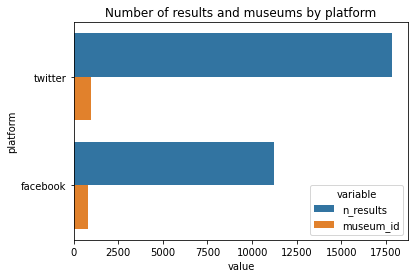

following (3061) rt (2669) open (2261) please (2251) line (1950) scottish (1944) local (1943) 
follow (1837) new (1778) people (1736) welsh (1522) day (1472) uk (1423) latest (1386) 
today (1359) support (1358) council (1306) covid-19 (1249) 're (1214) help (1203) 

guidance (4487) please (3831) support (3246) guidelines (3216) people (2763) social (2731) visit (2730) 
advice (2628) us (2533) help (2456) open (2445) new (2185) covid-19 (2178) information (2165) 
website (2105) local (2084) continue (2075) government (1975) restrictions (1920) public (1904) 



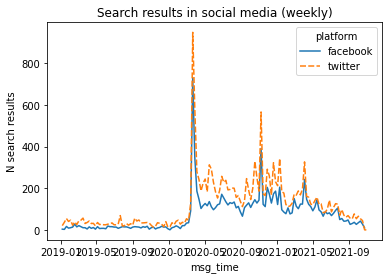

Unique museum results: 1823


,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
0,Independent:Not for profit,791,43.4,1534,51.6,45.9,-2.5
1,Government:Local Authority,514,28.2,718,71.6,21.5,6.7
2,Independent:Private,172,9.4,472,36.4,14.1,-4.7
3,Independent:National Trust,132,7.2,183,72.1,5.5,1.7
4,Government:National,60,3.3,69,87.0,2.1,1.2
5,University,59,3.2,92,64.1,2.8,0.4
6,Independent:Unknown,41,2.2,113,36.3,3.4,-1.2
7,Independent:English Heritage,24,1.3,52,46.2,1.6,-0.3
8,Unknown,16,0.9,55,29.1,1.6,-0.7
9,Independent:National Trust for Scotland,7,0.4,26,26.9,0.8,-0.4


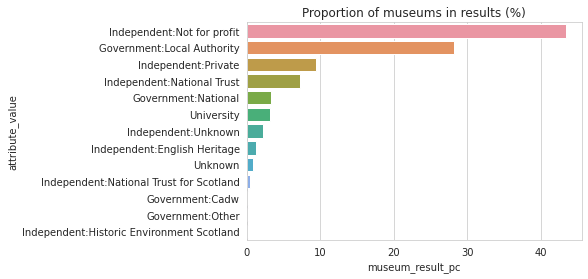

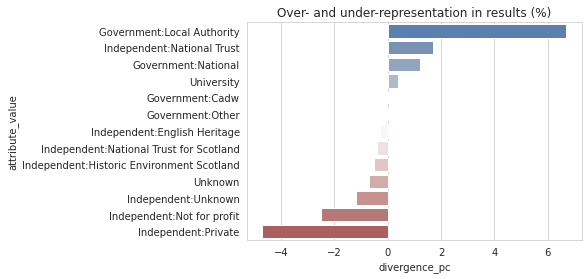

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
13,South East,270,14.8,476,56.7,14.2,0.6
14,South West,210,11.5,422,49.8,12.6,-1.1
15,Scotland,195,10.7,494,39.5,14.8,-4.1
16,London,178,9.8,238,74.8,7.1,2.7
17,North West,176,9.7,247,71.3,7.4,2.3
18,East of England,155,8.5,333,46.5,10.0,-1.5
19,Yorkshire and The Humber,147,8.1,229,64.2,6.9,1.2
20,West Midlands,127,7.0,228,55.7,6.8,0.2
21,East Midlands,122,6.7,229,53.3,6.9,-0.2
22,Wales,115,6.3,207,55.6,6.2,0.1


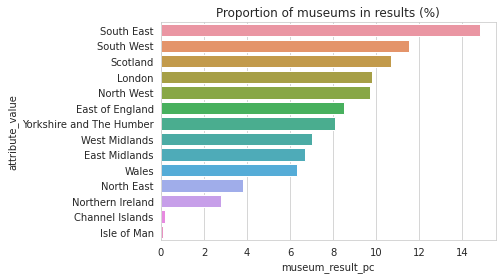

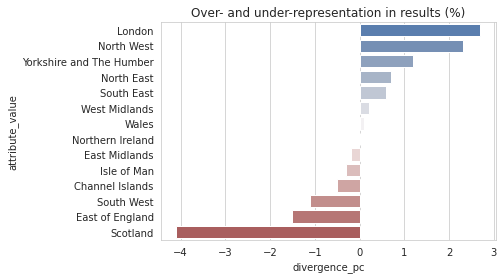

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
27,small,714,39.2,1825,39.1,54.6,-15.4
28,medium,558,30.6,865,64.5,25.9,4.7
29,large,477,26.2,498,95.8,14.9,11.3
30,unknown,62,3.4,141,44.0,4.2,-0.8
31,huge,11,0.6,12,91.7,0.4,0.2


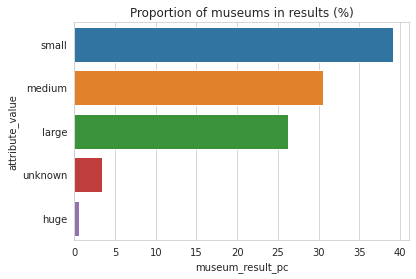

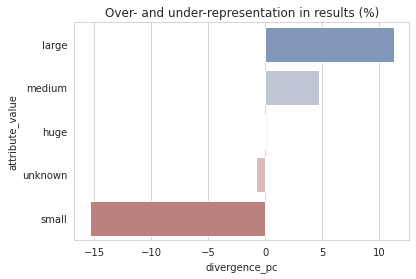

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
32,Local Histories,338,18.5,764,44.2,22.9,-4.4
33,Buildings,331,18.2,553,59.9,16.6,1.6
34,Arts,175,9.6,247,70.9,7.4,2.2
35,War and conflict,166,9.1,333,49.8,10.0,-0.9
36,Transport,143,7.8,224,63.8,6.7,1.1
37,Mixed,143,7.8,166,86.1,5.0,2.8
38,Personality,96,5.3,176,54.5,5.3,0.0
39,Industry and manufacture,79,4.3,151,52.3,4.5,-0.2
40,Sea and seafaring,61,3.3,102,59.8,3.1,0.2
41,Belief and identity,54,3.0,96,56.2,2.9,0.1


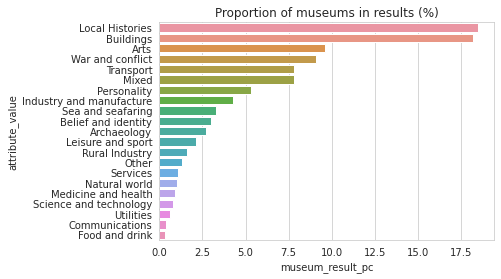

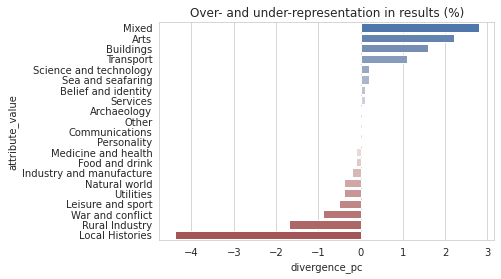

In [4]:
%run search_utils.py
#@title Analysis options { display-mode: "form" }
token_context_size =  10#@param {type:"integer"}
list_before_after_words_limit =  20#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size, list_before_after_words_limit)
#res_attr_df

### Download results as Excel or CSV

If save as Excel fails, try CSV.

In [ ]:
# click here to download the complete search results as EXCEL
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the complete search results as CSV
fn = 'search_results_{}.csv'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_csv(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [ ]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>